In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from tqdm import trange
%matplotlib inline

# Load data

In [12]:
ngram=3

_dfx = pd.read_csv('BOW-datasets/BOW_{}-gram_data.csv'.format(ngram), header=0, index_col=0)
_dfy = pd.read_csv('BOW-datasets/BOW_{}-gram_labels.csv'.format(ngram), header=0, index_col=0)
# _dfx = pd.read_csv('BOW-datasets/Tfidf_{}-gram_data.csv'.format(ngram), header=0, index_col=0)
# _dfy = pd.read_csv('BOW-datasets/Tfidf_{}-gram_labels.csv'.format(ngram), header=0, index_col=0)

X = _dfx.values
y = _dfy.values
feat_names = _dfx.columns
print(X.shape)

(57612, 1010)


# Evaluate Lasso path

In [13]:
# Evaluate the Lasso-path
nC = 10
coefs = np.empty((X.shape[1], nC))
C_range = np.logspace(-5, 0, nC)
for i in trange(nC):
    coefs[:, i] = LogisticRegression(penalty='l1', C=C_range[i]).fit(X, y.ravel()).coef_

100%|██████████| 10/10 [1:14:47<00:00, 448.77s/it]


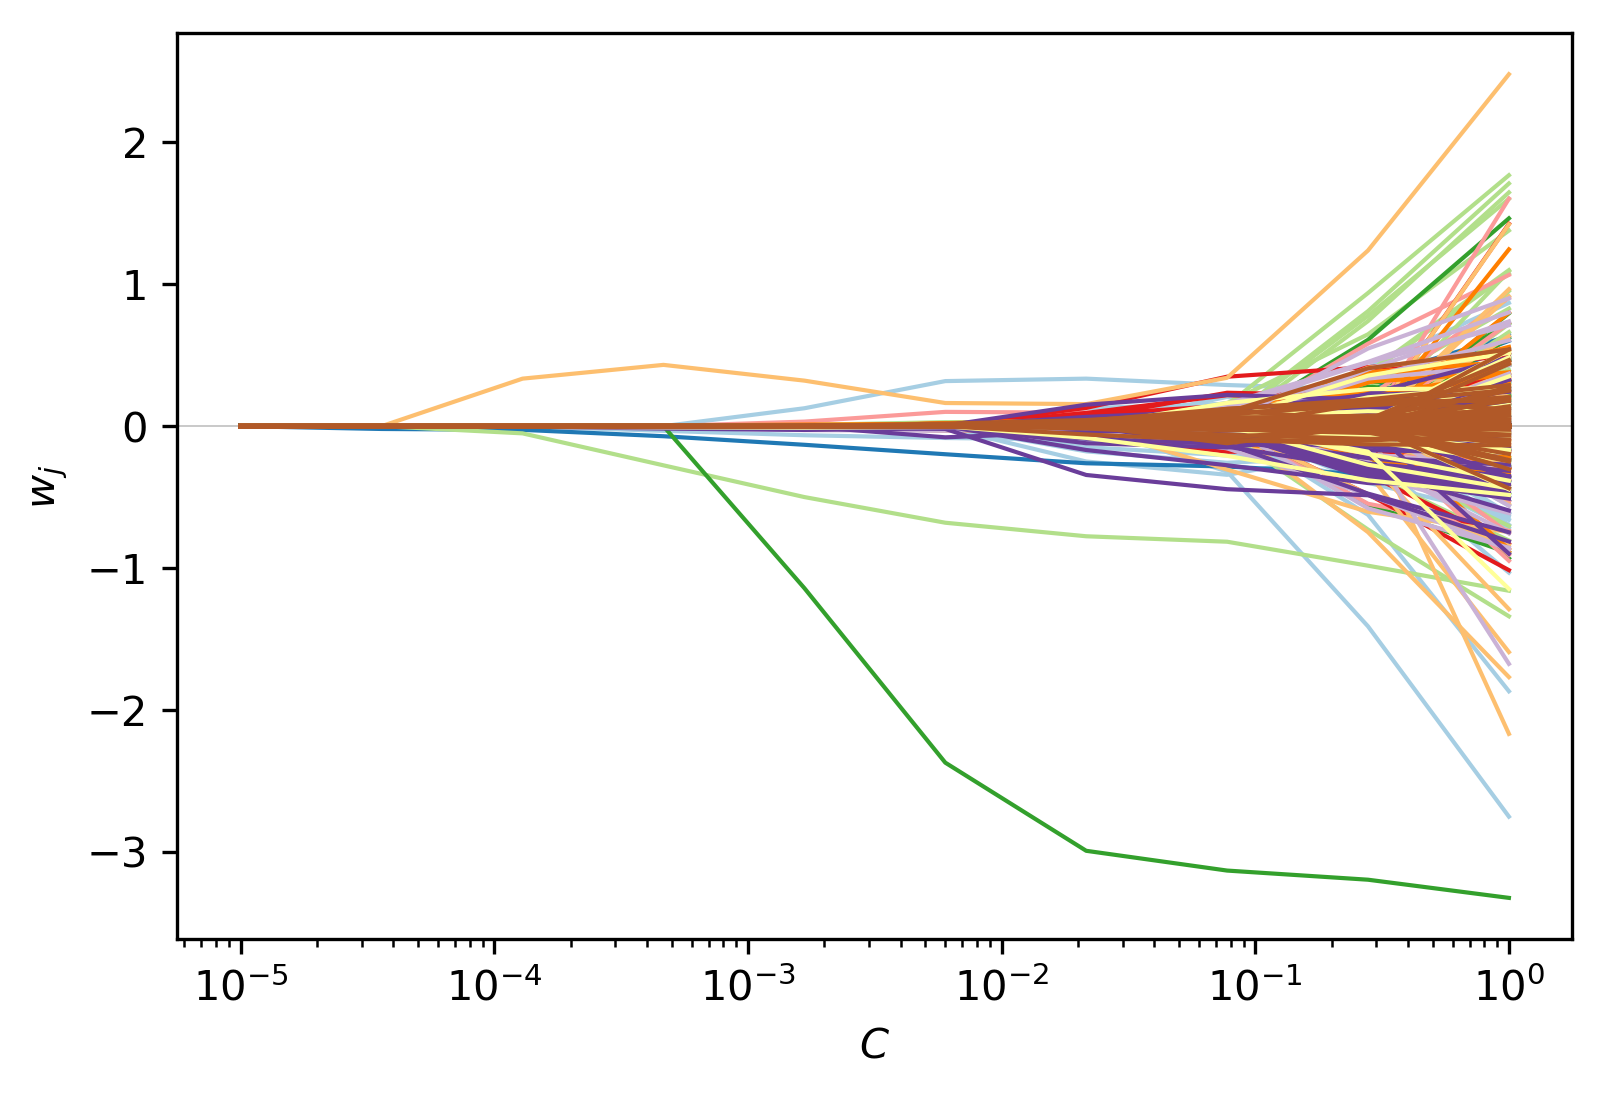

In [14]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

colormap = plt.cm.Paired
ax.set_color_cycle([colormap(i) for i in np.linspace(0, 1, coefs.shape[0])])
plt.axhline(color='k', linewidth=.1, linestyle='solid') # xaxis

for _coef, _feature in zip(coefs, _dfx.columns):
    ax.semilogx(C_range, _coef, '-', label=_feature.upper(), linewidth=1)
    
# lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=2)
plt.xlabel(r'$C$')
plt.ylabel(r'$w_j$');

Check which coefs detach from 0 first.

In [15]:
features = _dfx.columns
nonzero = []
for c in coefs.T:
    nonzero_id = np.where(c.ravel() != 0)[0]
    for f in features[nonzero_id]:
        if f not in nonzero:
            nonzero.append(f)

for i, n in enumerate(nonzero):
    print('{}) {}'.format(i+1, n.upper()))

1) R1T
2) S0T
3) L3I
4) G3H
5) 0T2
6) P0P
7) 1O2
8) L2G
9) T2D
10) 3S1
11) L3S
12) 2
13) D1I
14) T2O
15) T4H
16) R4T
17) S2P
18) E0P
19) S0G
20) G4
21) G1
22) 3S0
23) 3S
24) R2L
25) 2S3
26) 0R3
27) H2T
28) P2S
29) E4E
30) E0B
31) D3O
32) D2I
33) 1P1
34) 2R2
35) 0
36) P0O
37) 1O0
38) D0
39) 3P
40) B2O
41) 1I1
42) 3L3
43) O2E
44) T4B
45) I4T
46) O1H
47) B
48) 4
49) H2R
50) H2G
51) D4
52) 0H2
53) 0H4
54) P3L
55) 0I4
56) 4I4
57) E4G
58) D2S
59) 4L
60) I1I
61) R1D
62) 2R0
63) P0G
64) P0T
65) 3H0
66) T0
67) T1
68) L2I
69) L2H
70) L2L
71) 3R
72) 3G
73) P4O
74) S0E
75) P4P
76) 3L2
77) L1T
78) S0
79) 2E1
80) P0D
81) O1I
82) T3L
83) I3D
84) I3E
85) 0D4
86) 0D3
87) L3T
88) H2I
89) O4O
90) S1O
91) L2B
92) T0L
93) G0D
94) 2B2
95) H0L
96) 0R
97) G3D
98) R4G
99) P1
100) G0G
101) 4G1
102) G4I
103) G3B
104) G3E
105) G3L
106) 1H3
107) R0D
108) 2I1
109) L3E
110) 3B3
111) 4I0
112) 0T1
113) D2P
114) I1R
115) D2H
116) I1D
117) D2G
118) O3S
119) O3I
120) L3O
121) 4S
122) R1S
123) R1E
124) 1P2
125) G2
126) H4